## Занятие №11

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
import random
from numpy.linalg import inv, qr

- Градиентный спуск - пакетный градиентный спуск. Для работы использует все обучающие данные
- Стохастический градиентный спук, на каждой итерации мы обучаемся только на одной выбоке из данных.
- Сокращение числа вычислений
- Вносим смещение -> боремся с переобучением
- Мини-паккетный градиентный спуск, на каждой итерации используется несколько выборок

In [2]:
data = np.array(
    [
        [1, 5],
        [2, 7],
        [3, 7],
        [4, 10],
        [5, 11],
        [6, 14],
        [7, 17],
        [8, 19],
        [9, 22],
        [10, 28],
    ]
)

x = data[:, 0]
y = data[:, 1]
n = len(x)

w1 = 0.0
w0 = 0.0

L = 0.001

# размер выборки
sample_size = 1
iterations = 100_000

for i in range(iterations):
    idx = np.random.choice(n, sample_size, replace=False)
    D_w0 = 2 * sum((-y[idx] + w0 + w1 * x[idx]))
    D_w1 = 2 * sum((x[idx] * (-y[idx] + w0 + w1 * x[idx])))
    w1 -= L * D_w1
    w0 -= L * D_w0

print(w1, w0)

2.438909795426801 0.8221506148590535


Как оценить наскрлько сильно промахиваются прогнозы при использовани линейной регрессии

In [3]:
data_df = pd.DataFrame(data)
print(data_df.corr(method="pearson"))

         0        1
0  1.00000  0.97684
1  0.97684  1.00000


In [4]:
data_df[1] = data_df[1].values[::-1]
print(data_df.corr(method="pearson"))

         0        1
0  1.00000 -0.97684
1 -0.97684  1.00000


- Коэф. корреляции помогает понять, есть ли связь между двумя переменными
- Обучающие и тестовые выборки
- Основной метод борьбы с переобучением - обучающие и тестовые выборки
- Во всех видах МО с учителем это встречается
- Обычная пропорция - 2/3 на обучение и 1/3 на тест(4/5 к 1/5 или 9/10 к 1/10)

In [5]:
data_df = pd.DataFrame(data)
X = data_df.values[:, :-1]
Y = data_df.values[:, 1]

# print(X)
# print(Y)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 / 3)

print(X_train)
print(Y_train)

print(X_test)
print(Y_test)


kfold = KFold(
    n_splits=3, random_state=1, shuffle=True
)  # трехкратная перекрестаня валидация
model = LinearRegression()


result = cross_val_score(model, X, Y, cv=kfold)
print(result)
print(result.mean(), result.std())

print()
model.fit(X_test, Y_test)
r = model.score(X_test, Y_test)
print(r)

[[ 4]
 [ 7]
 [10]
 [ 1]
 [ 2]
 [ 3]]
[10 17 28  5  7  7]
[[8]
 [5]
 [6]
 [9]]
[19 11 14 22]
[ 0.88414769 -2.35154626  0.75792214]
-0.23649214168138835 1.4964566263570558

0.9986301369863014


- Метрики поазывают насколько единнобразно вдет себя модель на разных выборках

- Возможно использование поэлементной перекрестной валидации - когда мало данных
случайная валидация

- Валидационная выборка - для сравения различных моделей или конфигураций моделей

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Володя\AppData\Local\Temp\ipykernel_13296\3991710737.py:1: SyntaxWarning: invalid escape sequence '\m'
  data_df = pd.read_csv("data\multiple_independent_variable_linear.csv")


   x1  x2   y
0   0  22  88
1   1  13  62
2   1  15  67
3   1  14  62
4   2  18  77
[2.00672647 3.00203798] 20.109432820035963


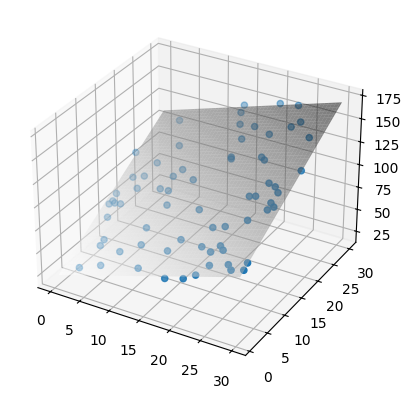

In [6]:
data_df = pd.read_csv("data\multiple_independent_variable_linear.csv")
print(data_df.head())
X = data_df.values[:, :-1]
Y = data_df.values[:, -1]

model = LinearRegression().fit(X, Y)
print(model.coef_, model.intercept_)


x1 = X[:, 0]
x2 = X[:, 1]
y = Y
fig = plt.figure()
ax = plt.axes(projection="3d")
ax.scatter3D(x1, x2, y)

x1_ = np.linspace(min(x1), max(x1), 100)
x2_ = np.linspace(min(x2), max(x2), 100)
X1_, X2_ = np.meshgrid(x1_, x2_)

Y_ = model.intercept_ + model.coef_[0] * X1_ + model.coef_[1] * X2_

ax.plot_surface(X1_, X2_, Y_, cmap="Greys", alpha=0.5)